# Ames Housing Saleprice

## Problem Statement

Create a regression model where we are able to predict the price of the house at sales.

## Executive Summary

### Contents:
- [7. Model_Benchmarks](#7.-Model-Benchmarks)


Links:
[Kaggle challenge link](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)

# 7. Model Benchmarks

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
plt.style.use('ggplot')

In [2]:
# Importing cleaned dataset for Pre Processing
df = pd.read_csv("../datasets/data_PP_FE.csv", na_filter=False)
df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

df.shape, df_train.shape, df_test.shape

((2712, 82), (2051, 81), (879, 80))

In [3]:
df_train_rows = df_train['Id'].tolist()
df_test_rows = df_test['Id'].tolist()

df_train = df.loc[df['Id'].isin(df_train_rows)]
df_test = df.loc[df['Id'].isin(df_test_rows)]

df_train.shape ,df_test.shape

((1833, 82), (879, 82))

In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1833.0,1476.957992,845.884327,1.000000,746.000000,1488.000000,2193.000000,2930.000000
Overall Qual,1833.0,0.004517,0.982926,-3.064201,-0.803971,-0.050561,0.702849,2.963080
Year Built,1833.0,0.016064,0.992102,-2.893434,-0.586321,0.082407,0.985191,1.286119
Year Remod/Add,1833.0,-0.004017,1.009196,-1.644679,-0.972799,0.418952,0.946857,1.234805
Mas Vnr Area,1833.0,-0.054499,0.858562,-0.588753,-0.588753,-0.588753,0.351189,3.381353
...,...,...,...,...,...,...,...,...
Heating_GasA,1833.0,0.989089,0.103913,0.000000,1.000000,1.000000,1.000000,1.000000
Heating_GasW,1833.0,0.008183,0.090115,0.000000,0.000000,0.000000,0.000000,1.000000
Heating_Grav,1833.0,0.002182,0.046676,0.000000,0.000000,0.000000,0.000000,1.000000
Heating_OthW,1833.0,0.000546,0.023357,0.000000,0.000000,0.000000,0.000000,1.000000


## 7.1 Train Split Test

In [5]:
col_keys = df.drop(columns = ['Id','SalePrice']).keys()
col_keys

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Exter Qual', 'Foundation', 'Bsmt Qual', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'Total Bsmt SF', 'Heating QC',
       '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual',
       'TotRms AbvGrd', 'Fireplaces', 'Fireplace Qu', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborh

In [6]:
y = df_train['SalePrice']
X = df_train[col_keys]

## 7.1.1 Linear

In [7]:
lr = LinearRegression()
lr.fit(X,y)
lr_cv_mean_mse = (-cross_val_score(lr, X, y, cv=5, scoring = 'neg_mean_squared_error')).mean()
lr_cv_mean_r2 = (cross_val_score(lr, X, y, cv=5, scoring = 'r2')).mean()
(lr_cv_mean_mse, lr_cv_mean_r2)

(9.652988536045456e+29, -2.368263378618337e+20)

In [8]:
def plot_residuals(model, X_train, y):
    plt.rcParams['figure.figsize'] = (6.0, 6.0)
    preds = pd.DataFrame({"preds":model.predict(X_train), "true":y})
    preds["residuals"] = preds["true"] - preds["preds"]
    preds.plot(x = "preds", y = "residuals",kind = "scatter")

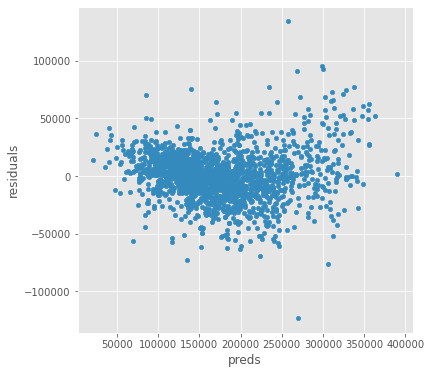

In [9]:
plot_residuals(lr, X, y)

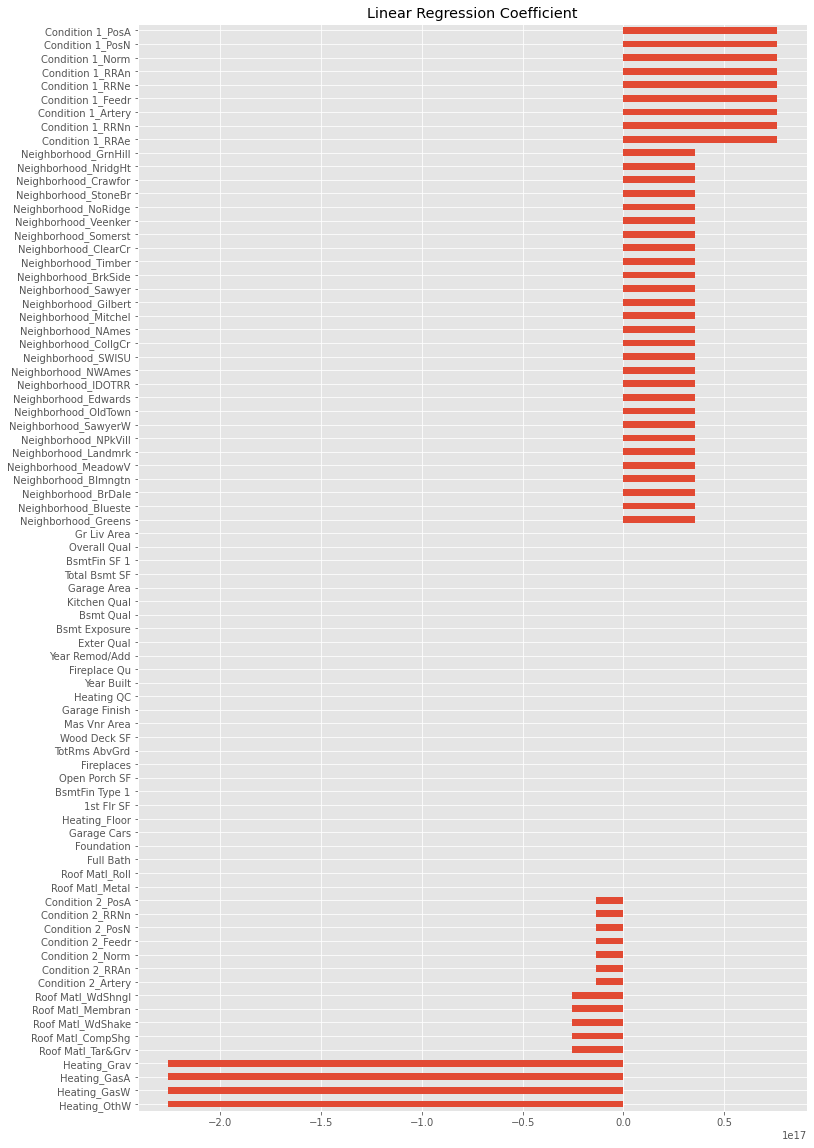

In [10]:
coef = pd.Series(lr.coef_, index = X.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (12, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Linear Regression Coefficient");

### 7.1.1 comments 
Terrible model, having a negative r2 value, will use the ridge, lasso and elasticnet models to see which features to eliminate

## 7.1.2 Ridge

In [11]:
alpha = 100
ridge = Ridge(alpha = alpha)
ridge_cv_mean_mse = np.sqrt(-cross_val_score(ridge, X, y, cv=5, scoring = 'neg_mean_squared_error')).mean()
ridge_cv_mean_r2 = (cross_val_score(ridge, X, y, cv=5, scoring = 'r2')).mean()
(ridge_cv_mean_mse, ridge_cv_mean_r2)

(22644.04548085825, 0.8781218143501551)

In [12]:
r_alphas = np.logspace(0,5,200)
ridge = RidgeCV(alphas = r_alphas, store_cv_values = True)
ridge.fit(X, y)

RidgeCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
        store_cv_values=True)

In [13]:
ridge_optimal_alpha = ridge.alpha_
ridge_optimal_alpha

2.3816855519761586

In [14]:
ridge_cv_means = [np.sqrt(cv_alpha).mean() for cv_alpha in ridge.cv_values_.T]
ridge_cv_means[:5]

[15994.51371662053,
 15995.371238477219,
 15996.316379810207,
 15997.284317190804,
 15998.263298918255]

In [15]:
ridge_opt = Ridge(alpha = ridge_optimal_alpha)
ridge_opt_mean_mse = np.sqrt(-cross_val_score(ridge_opt, X, y, cv=5, scoring = 'neg_mean_squared_error')).mean()
ridge_opt_mean_r2 = (cross_val_score(ridge_opt, X, y, cv=5, scoring = 'r2')).mean()
(ridge_opt_mean_mse, ridge_opt_mean_r2)

(21899.97287270673, 0.885968960037814)

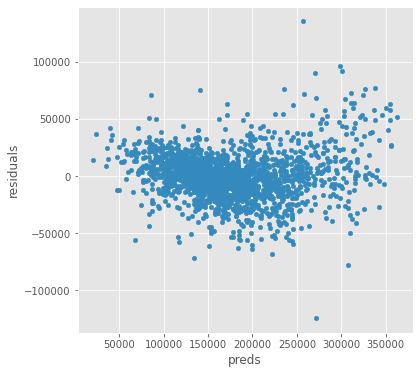

In [16]:
plot_residuals(ridge, X, y)

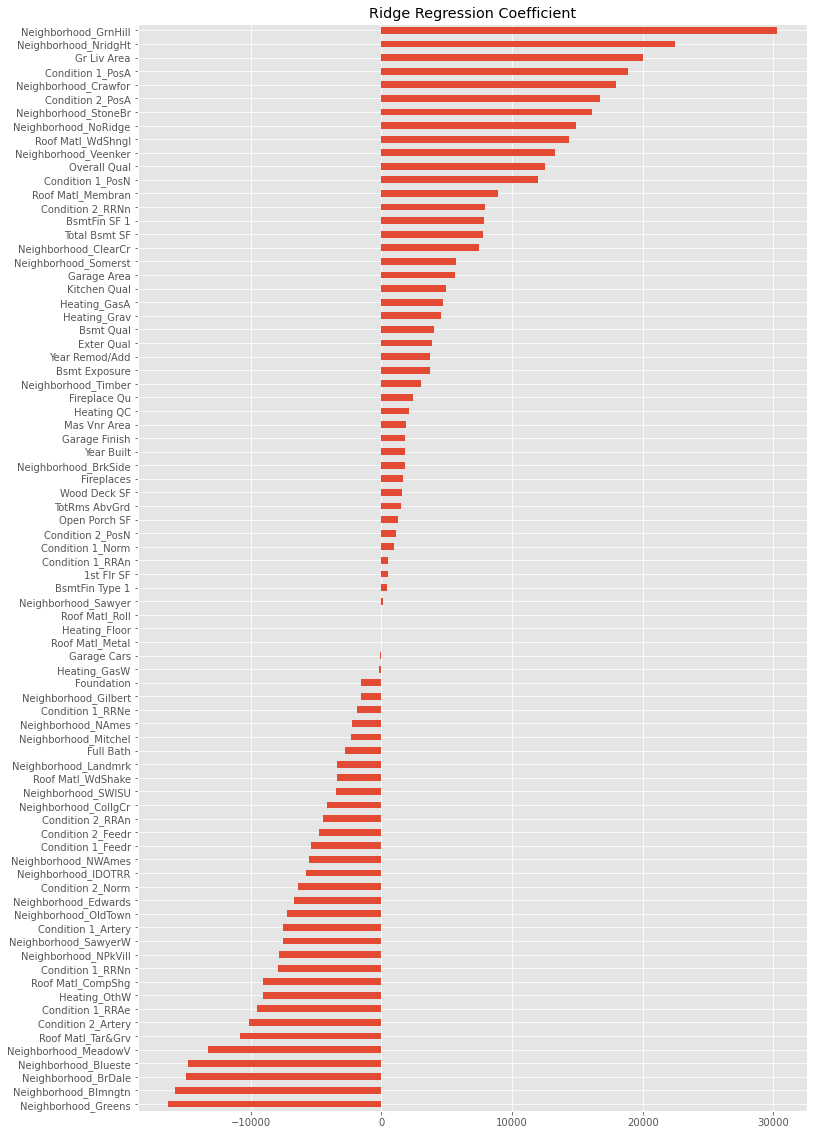

In [17]:
ridge_opt.fit(X, y)
coef = pd.Series(ridge_opt.coef_, index = X.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (12, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Ridge Regression Coefficient");

# 7.1.3 Lasso

In [18]:
l_alphas = np.arange(0.001, 0.15, 0.0025)
lasso = LassoCV(alphas = r_alphas, cv=5)
lasso.fit(X, y)

LassoCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
        cv=5)

In [19]:
lasso_optimal_alpha = lasso.alpha_
lasso_optimal_alpha

10.116379797662075

In [20]:
lasso_opt = Lasso(alpha = lasso_optimal_alpha)
lasso_opt_mean_mse = np.sqrt(-cross_val_score(lasso_opt, X, y, cv=5, scoring = 'neg_mean_squared_error')).mean()
lasso_opt_mean_r2 = (cross_val_score(lasso, X, y, cv=5, scoring = 'r2')).mean()
(lasso_opt_mean_mse, lasso_opt_mean_r2)

(21946.46712883391, 0.8851950600665293)

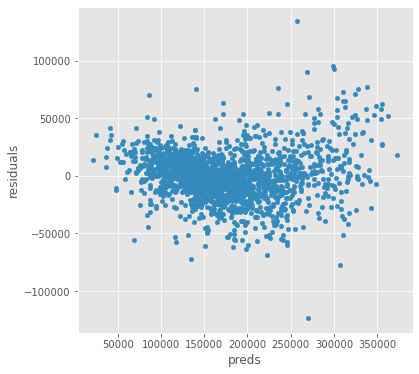

In [21]:
plot_residuals(lasso, X, y)

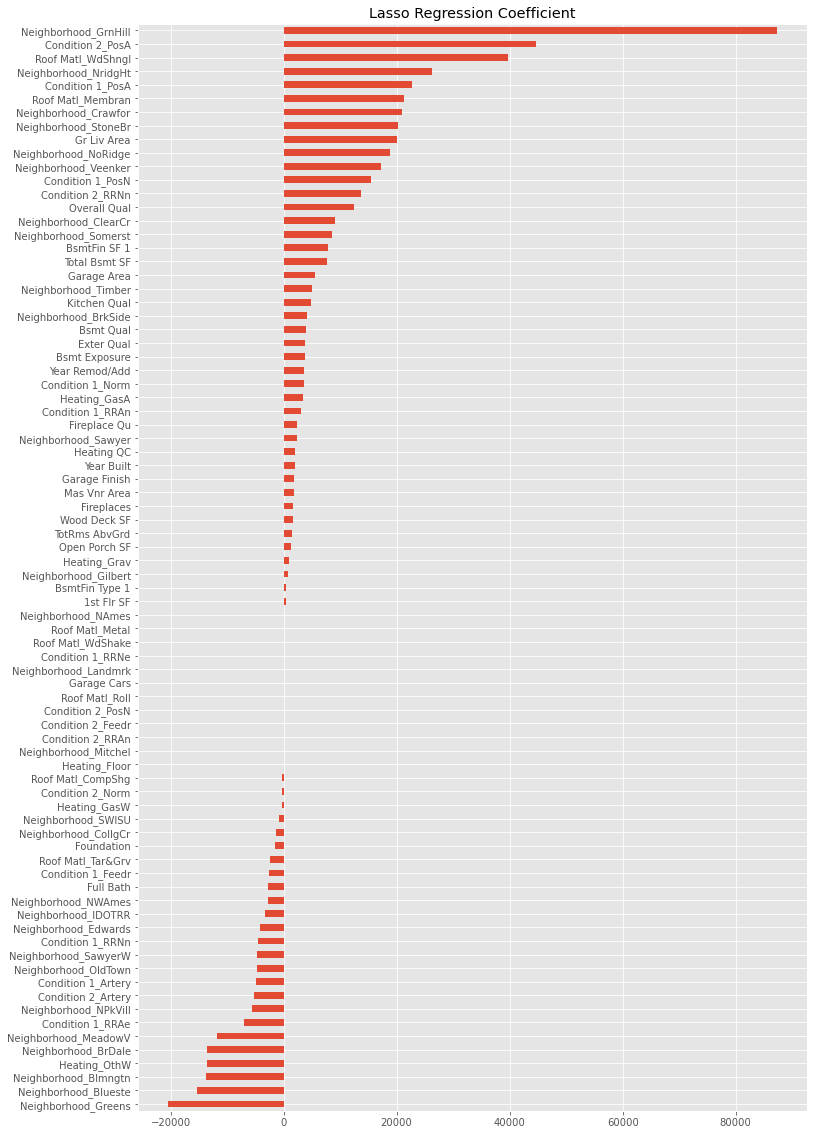

In [22]:
lasso_opt.fit(X,y)
coef = pd.Series(lasso_opt.coef_, index = X.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (12, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Lasso Regression Coefficient");

# 7.1.4 Elastic Net

In [23]:
elasticnet = ElasticNetCV(alphas = r_alphas, cv=5)
elasticnet.fit(X, y)

ElasticNetCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.370064...
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
             cv=5)

In [24]:
elasticnet_optimal_alpha = elasticnet.alpha_
elasticnet_optimal_alpha

1.0

In [25]:
elasticnet_opt = ElasticNet(alpha = elasticnet_optimal_alpha)
elasticnet_opt_mean_mse = np.sqrt(-cross_val_score(elasticnet_opt, X, y, cv=5, scoring = 'neg_mean_squared_error')).mean()
elasticnet_opt_mean_r2 = (cross_val_score(elasticnet_opt, X, y, cv=5, scoring = 'r2')).mean()
(elasticnet_opt_mean_mse, elasticnet_opt_mean_r2)

(24225.849918545224, 0.8606888419494408)

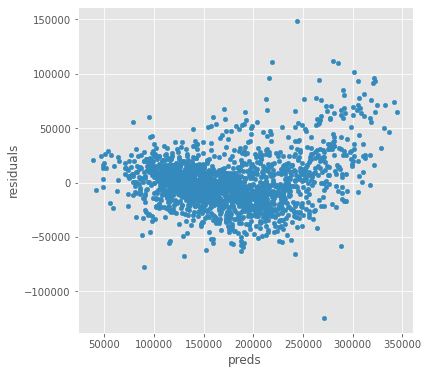

In [26]:
plot_residuals(elasticnet, X, y)

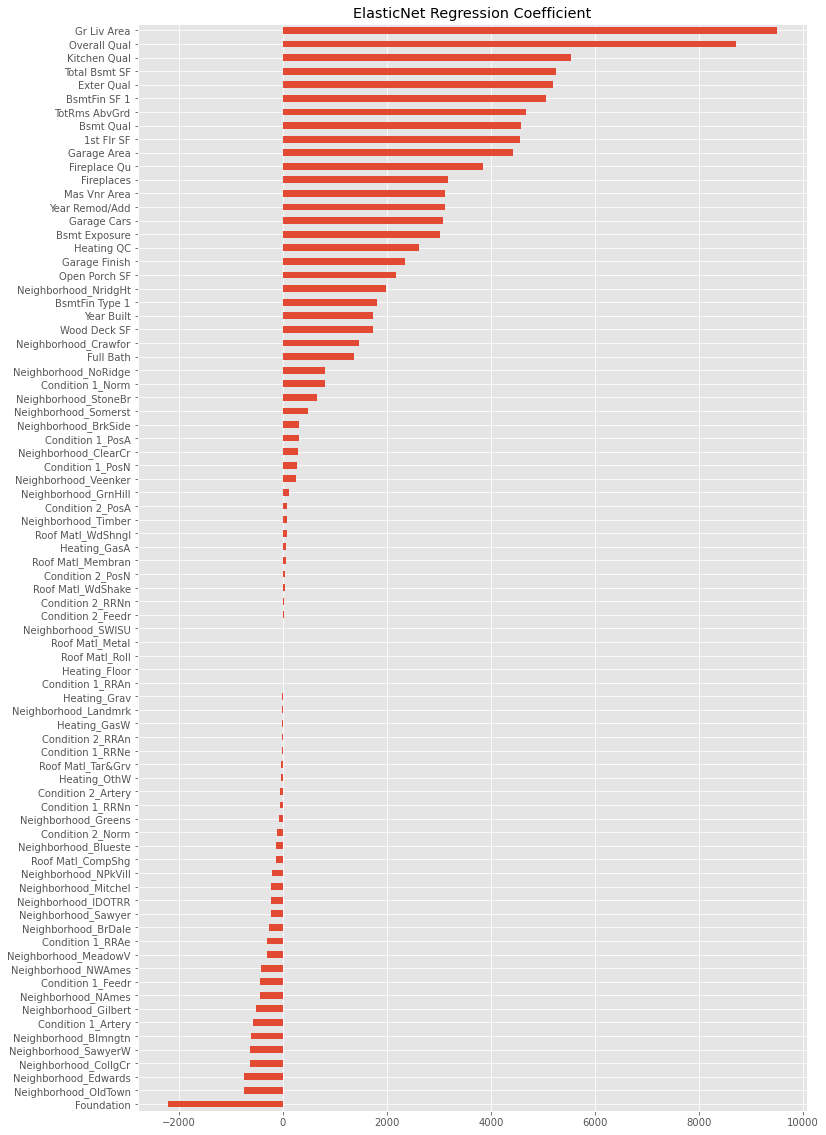

In [27]:
elasticnet_opt.fit(X,y)
coef = pd.Series(elasticnet_opt.coef_, index = X.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (12, 20.0)
imp_coef.plot(kind = "barh")
plt.title("ElasticNet Regression Coefficient");

# Kaggle Submission

In [28]:
X_test = df_test[col_keys]

In [29]:
test_predict = lasso_opt.predict(X_test)

In [30]:
len(test_predict)

879

In [31]:
df_test.reset_index(inplace = True) # reseting index of test data

In [32]:
df_test

,index,Id,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Foundation,Bsmt Qual,Bsmt Exposure,...,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,SalePrice
0,1833,2658,-0.050561,-2.057524,-1.644679,-0.588753,-0.688313,-3.791173,-1.997034,-0.604267,...,0,0,0,0,0,1,0,0,0,0
1,1834,2718,-0.803971,0.182717,-0.348911,-0.588753,-0.688313,0.522811,0.630795,-0.604267,...,0,0,0,0,0,1,0,0,0,0
2,1835,2414,0.702849,1.152373,1.042840,-0.588753,1.104871,-0.915184,0.630795,1.330529,...,0,0,0,0,0,1,0,0,0,0
3,1836,1989,-0.803971,-1.622850,1.042840,-0.588753,1.104871,0.522811,-0.683119,-0.604267,...,0,0,0,0,0,1,0,0,0,0
4,1837,625,-0.050561,-0.285393,-1.020791,1.034783,-0.688313,0.522811,0.630795,-0.604267,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,2707,1662,-0.050561,0.082407,-0.492885,-0.588753,-0.688313,0.522811,-0.683119,-0.604267,...,0,0,0,0,0,1,0,0,0,0
875,2708,1234,-0.050561,-0.185084,0.706900,2.106186,1.104871,0.522811,-0.683119,-0.604267,...,0,0,0,0,0,1,0,0,0,0
876,2709,1373,-0.803971,-0.118211,-0.780834,-0.588753,-0.688313,0.522811,-0.683119,-0.604267,...,0,0,0,0,0,1,0,0,0,0
877,2710,1672,-1.557381,-0.017902,-0.636859,-0.588753,-0.688313,-0.915184,-0.683119,-0.604267,...,0,0,0,0,0,1,0,0,0,0


In [33]:
df_predicted = pd.DataFrame(test_predict, columns = ['SalePrice'])

In [34]:
df_predicted

,SalePrice
0,143510.352535
1,191747.683758
2,204705.207583
3,113107.017182
4,182106.966210
...,...
874,195082.011510
875,219170.576908
876,127539.228440
877,107673.789533


In [35]:
submit = pd.concat([df_test['Id'], df_predicted['SalePrice']], 
                   ignore_index=False, sort=False, axis = 1)


In [36]:
submit.sort_values('Id', ascending = True, inplace = True)
submit.head()

,Id,SalePrice
704,2,112449.847587
706,4,260538.753364
120,6,193103.207970
312,7,232748.924438
401,17,214468.187743


In [37]:
submit.to_csv("../datasets/test_submit.csv", index=False)